In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

# [Problem 1] Understanding the content of the competition

- What kind of company is Home Credit?

<blockquote>
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.<br>

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

- What is expected in this competition?

<blockquote>
It seeks for a model which can predict Home Credit's clients abilities to repay their debts.

- What are the benefits companies can gain by predicting this?

<blockquote>
Well-calculated predictions will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

In [2]:
data = pd.read_csv('application_train.csv')

In [3]:
description = pd.read_csv('HomeCredit_columns_description.csv')

# [Problem 2] Understanding the overview of data

- Use .head() , .info() , describe() , etc...

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


- Check for missing values

In [7]:
display(data.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

- Draw a graph showing the percentage of classes

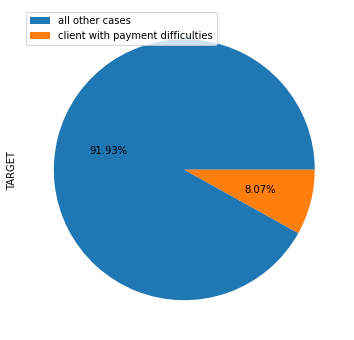

In [8]:
ex = data["TARGET"].value_counts()
# ex.rename({0: 'all other cases', 1: 'client with payment difficulties'}, inplace=True)
graph = ex.plot.pie(autopct="%.2f%%", figsize=(6, 6), legend='reverse', labels=None)
graph.legend(loc=2, labels={'all other cases': 0, 'client with payment difficulties': 1})

# [Problem 3] Defining issues

<blockquote>
- How dependent is the target on each feature (based on correlation), so that we can eliminate unnecesarry columns and have a consistent dataset? <br>
- Detect the relationships between features for ones that are related.

# [Problem 4] Data exploration

In [9]:
pd.set_option('display.max_columns', 122)
pd.set_option('display.max_rows', 10)
display(data)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [10]:
corr = data.corr()

<AxesSubplot:>

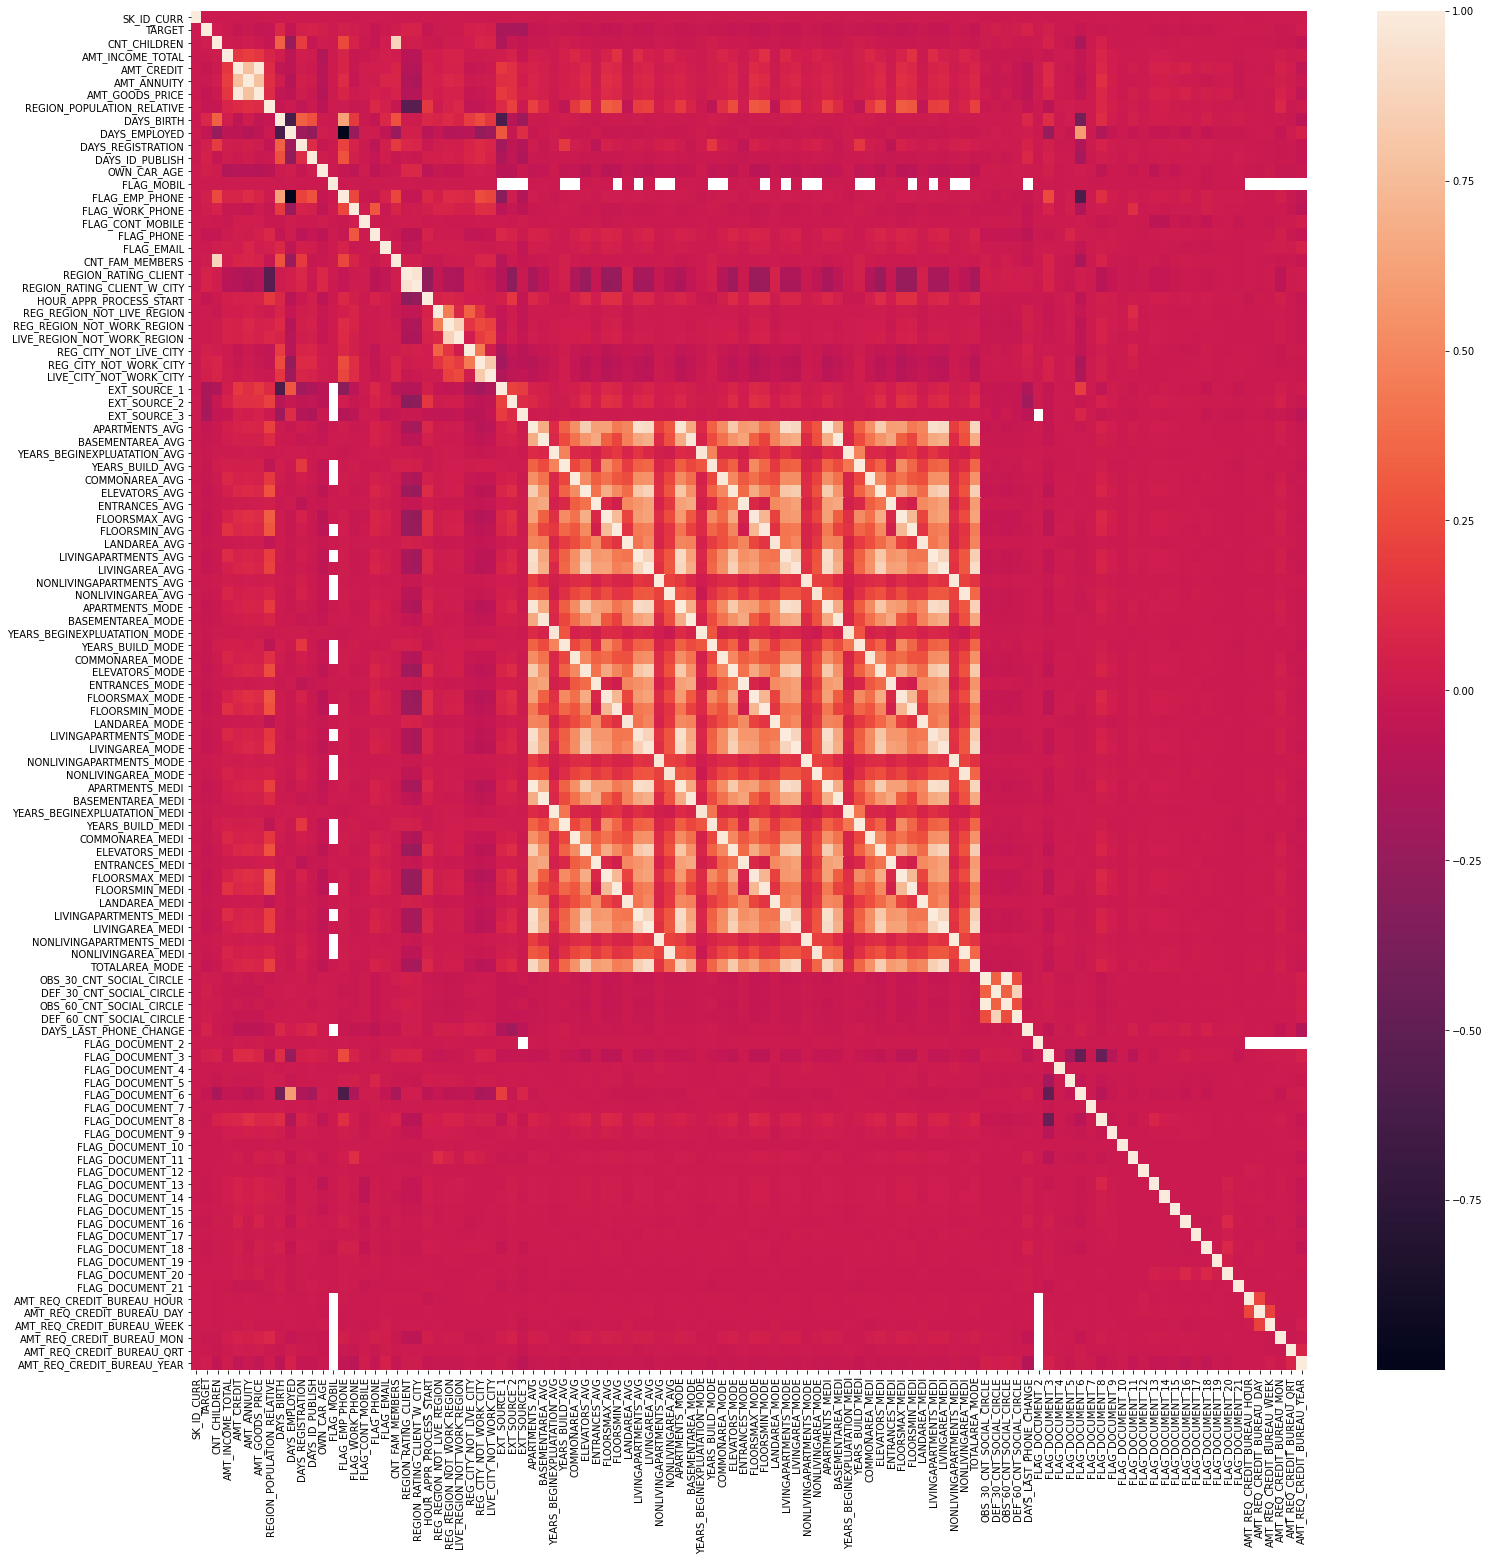

In [11]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(data=corr, ax=ax)

<AxesSubplot:>

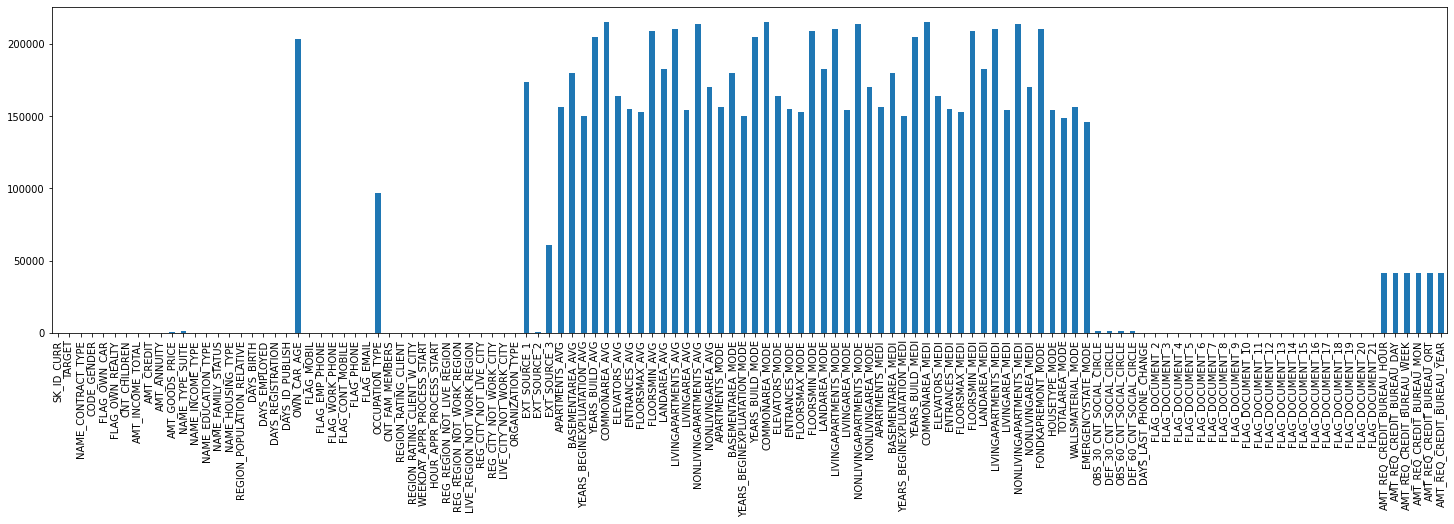

In [12]:
data.isnull().sum().plot.bar(figsize=(25, 6))

<AxesSubplot:>

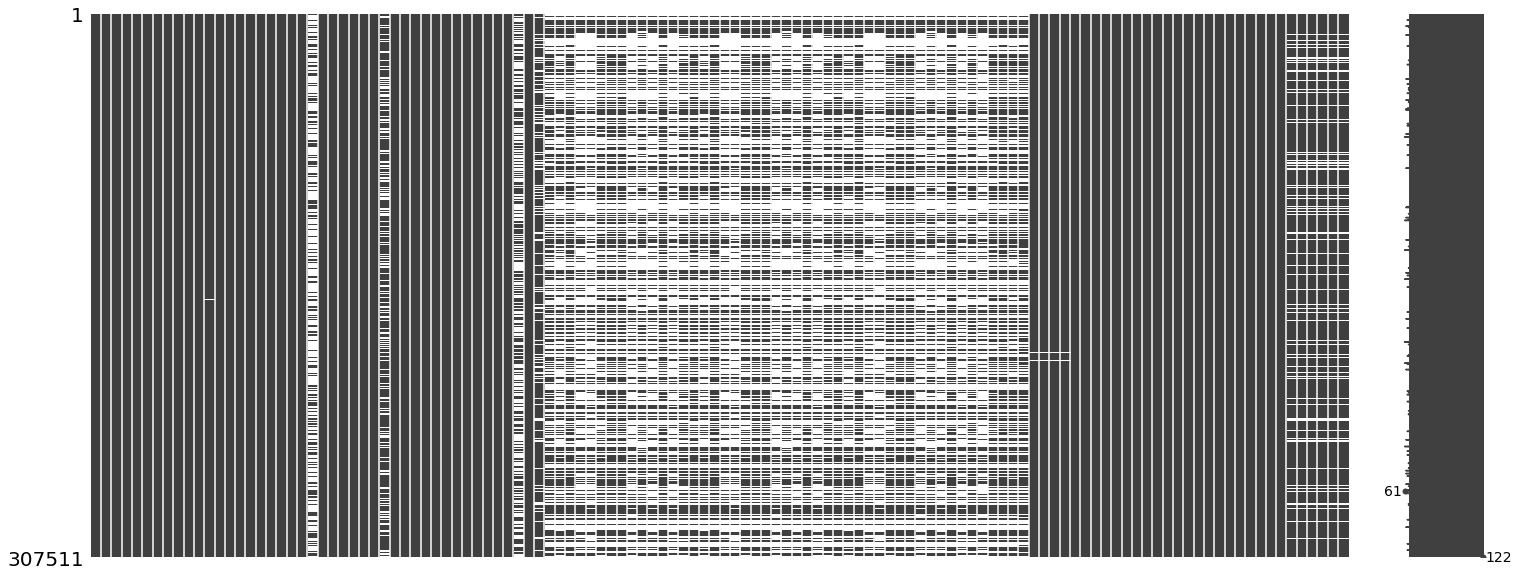

In [13]:
msno.matrix(data)

In [14]:
sorted_corr = corr.loc[:,"TARGET"].sort_values(ascending=False, key= lambda x: abs(x))

In [15]:
sorted_corr = data[sorted_corr.index]
sorted_corr

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY,FLAG_EMP_PHONE,DAYS_EMPLOYED,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_3,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,DAYS_REGISTRATION,AMT_GOODS_PRICE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,ELEVATORS_AVG,ELEVATORS_MEDI,FLOORSMIN_AVG,FLOORSMIN_MEDI,LIVINGAREA_AVG,LIVINGAREA_MEDI,FLOORSMIN_MODE,TOTALAREA_MODE,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,ELEVATORS_MODE,DEF_60_CNT_SOCIAL_CIRCLE,LIVINGAREA_MODE,AMT_CREDIT,APARTMENTS_AVG,APARTMENTS_MEDI,FLAG_DOCUMENT_6,FLAG_WORK_PHONE,APARTMENTS_MODE,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,HOUR_APPR_PROCESS_START,FLAG_PHONE,LIVINGAPARTMENTS_MODE,BASEMENTAREA_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,BASEMENTAREA_MEDI,YEARS_BUILD_MODE,BASEMENTAREA_MODE,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,ENTRANCES_AVG,ENTRANCES_MEDI,COMMONAREA_MEDI,COMMONAREA_AVG,ENTRANCES_MODE,COMMONAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,AMT_ANNUITY,NONLIVINGAREA_MODE,AMT_REQ_CREDIT_BUREAU_MON,FLAG_DOCUMENT_16,FLAG_DOCUMENT_13,LANDAREA_MEDI,LANDAREA_AVG,LANDAREA_MODE,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,FLAG_DOCUMENT_14,CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,YEARS_BEGINEXPLUATATION_MODE,OBS_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_8,FLAG_DOCUMENT_18,REG_REGION_NOT_WORK_REGION,FLAG_DOCUMENT_15,REG_REGION_NOT_LIVE_REGION,FLAG_DOCUMENT_2,FLAG_DOCUMENT_9,FLAG_DOCUMENT_11,AMT_INCOME_TOTAL,FLAG_DOCUMENT_21,FLAG_DOCUMENT_17,NONLIVINGAPARTMENTS_AVG,LIVE_REGION_NOT_WORK_REGION,NONLIVINGAPARTMENTS_MEDI,AMT_REQ_CREDIT_BUREAU_DAY,FLAG_DOCUMENT_4,SK_ID_CURR,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_EMAIL,NONLIVINGAPARTMENTS_MODE,FLAG_DOCUMENT_7,FLAG_DOCUMENT_10,FLAG_DOCUMENT_19,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,FLAG_DOCUMENT_12,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_DOCUMENT_5,FLAG_DOCUMENT_20
0,1,0.139376,0.262949,0.083037,-9461,2,2,-1134.0,-2120,0,1,-637,0,1,0.0833,0.0833,0.0833,-3648.0,351000.0,NaN,0.018801,0.00,0.00,0.1250,0.1250,0.0190,0.0193,0.1250,0.0149,0,2.0,0.0000,2.0,0.0198,406597.5,0.0247,0.0250,0,0,0.0252,0.0202,0.0205,10,1,0.0220,0.0369,0.6243,0.6192,0.0369,0.6341,0.0383,1.0,0,0.0690,0.0690,0.0144,0.0143,0.0690,0.0144,0.0000,0.0000,24700.5,0.0000,0.0,0,0,0.0375,0.0369,0.0377,0.9722,0.9722,0,1.0,2.0,0.9722,2.0,0,0,0,0,0,0,0,0,202500.0,0,0,0.0000,0,0.0000,0.0,0,100002,0.0,0,0.0,0,0,0,0.0,0.0,0,1,1,0,0
1,0,NaN,0.622246,0.311267,-16765,1,1,-828.0,-291,0,1,-1188,0,1,0.2917,0.2917,0.2917,-1186.0,1129500.0,NaN,0.003541,0.08,0.08,0.3333,0.3333,0.0549,0.0558,0.3333,0.0714,0,0.0,0.0806,0.0,0.0554,1293502.5,0.0959,0.0968,0,0,0.0924,0.0773,0.0787,11,1,0.0790,0.0529,0.7987,0.7960,0.0529,0.8040,0.0538,0.0,0,0.0345,0.0345,0.0608,0.0605,0.0345,0.0497,0.0098,0.0100,35698.5,0.0000,0.0,0,0,0.0132,0.0130,0.0128,0.9851,0.9851,0,2.0,1.0,0.9851,1.0,0,0,0,0,0,0,0,0,270000.0,0,0,0.0039,0,0.0039,0.0,0,100003,0.0,0,0.0,0,0,0,0.0,0.0,0,1,1,0,0
2,0,0.729567,0.555912,NaN,-19046,2,2,-815.0,-2531,0,1,-225,0,0,NaN,NaN,NaN,-4260.0,135000.0,26.0,0.010032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,0.0,NaN,135000.0,NaN,NaN,0,1,NaN,NaN,NaN,9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6750.0,NaN,0.0,0,0,NaN,NaN,NaN,NaN,NaN,0,1.0,0.0,NaN,0.0,0,0,0,0,0,0,0,0,67500.0,0,0,NaN,0,NaN,0.0,0,100004,0.0,0,NaN,0,0,0,0.0,0.0,0,1,1,0,0
3,0,NaN,0.650442,NaN,-19005,2,2,-617.0,-2437,0,1,-3039,0,1,NaN,NaN,NaN,-9833.0,297000.0,NaN,0.008019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,0.0,NaN,312682.5,NaN,NaN,0,0,NaN,NaN,NaN,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29686.5,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0,2.0,2.0,NaN,2.0,0,0,0,0,0,0,0,0,135000.0,0,0,NaN,0,NaN,NaN,0,100006,NaN,0,NaN,0,0,0,NaN,NaN,0,1,1,0,0
4,0,NaN,0.322738,NaN,-19932,2,2,-1106.0,-3458,1,1,-3038,0,0,NaN,NaN,NaN,-4311.0,513000.0,NaN,0.028663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,0.0,NaN,513000.0,NaN,NaN,0,0,NaN,NaN,NaN,11,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,N

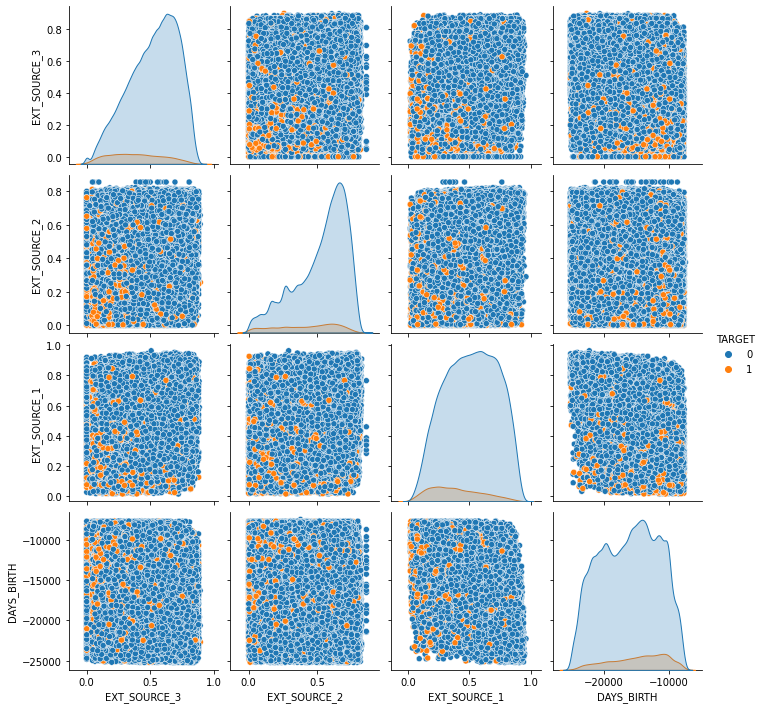

In [16]:
sns.pairplot(sorted_corr.iloc[:,:5], hue="TARGET")

In [17]:
# flag_analysis = pd.DataFrame(data["TARGET"]).join(data.loc[:,"FLAG_DOCUMENT_2":"FLAG_DOCUMENT_20"])

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='TARGET'>

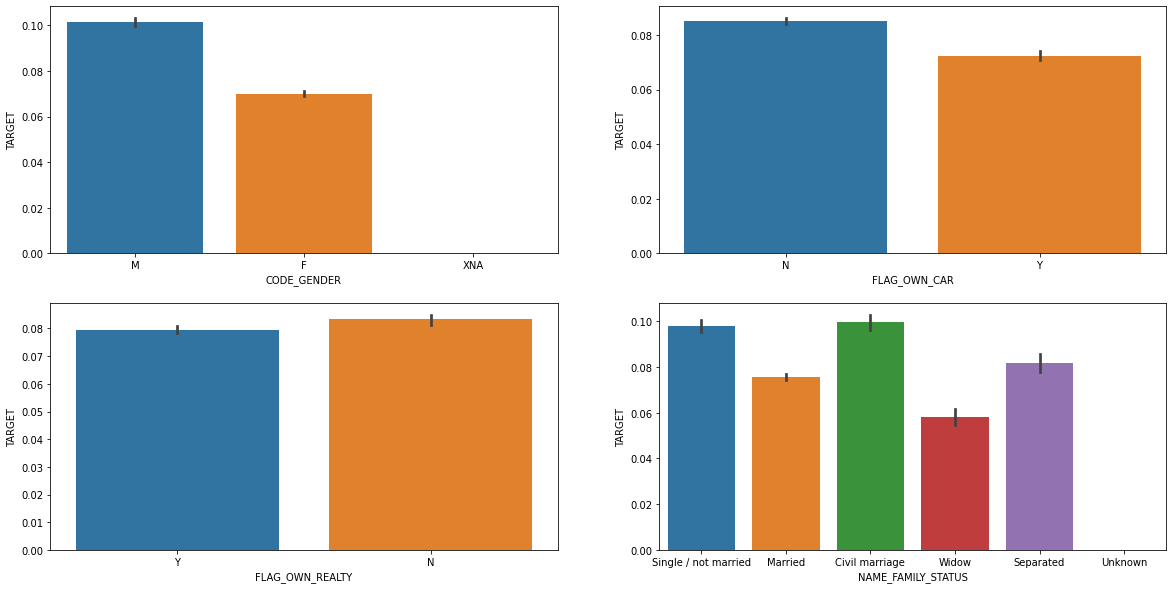

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.barplot(ax=axes[0,0],data=data, y='TARGET', x='CODE_GENDER')
sns.barplot(ax=axes[0,1],data=data, y='TARGET', x='FLAG_OWN_CAR')
sns.barplot(ax=axes[1,0],data=data, y='TARGET', x='FLAG_OWN_REALTY')
sns.barplot(ax=axes[1,1],data=data, y='TARGET', x='NAME_FAMILY_STATUS')

In [74]:
def graph(feature):
    if not feature in data.columns:
        raise Exception
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    temp = data[feature].value_counts()
    data_full = pd.DataFrame({feature: temp.index, 'Number of contracts': temp.values})
    data_feature = pd.Series(index=temp.index, data=temp.values)
    data0 = data[data["TARGET"]==0][feature].value_counts()
    data1 = data[data["TARGET"]==1][feature].value_counts()
    
    sns.barplot(data=data_full, y='Number of contracts', x=feature, ax=axes[0,0])
    graph = data_feature.plot.pie(autopct="%.3f%%", figsize=(5, 5), legend='reverse', labels=None, ax=axes[0,1], ylabel=feature)
    graph.legend(loc=0, labels=data_feature.index)      
    graph = data0.plot.pie(autopct="%.3f%%", figsize=(10, 10), legend='reverse', labels=None, ax=axes[1,0], title="Client with payment difficulties")
    graph.legend(loc=0, labels=data0.index)
    graph = data1.plot.pie(autopct="%.3f%%", figsize=(10, 10), legend='reverse', labels=None, ax=axes[1,1], title="All other cases", ylabel="")
    graph.legend(loc=0, labels=data1.index)
    plt.show()
    plt.clf()

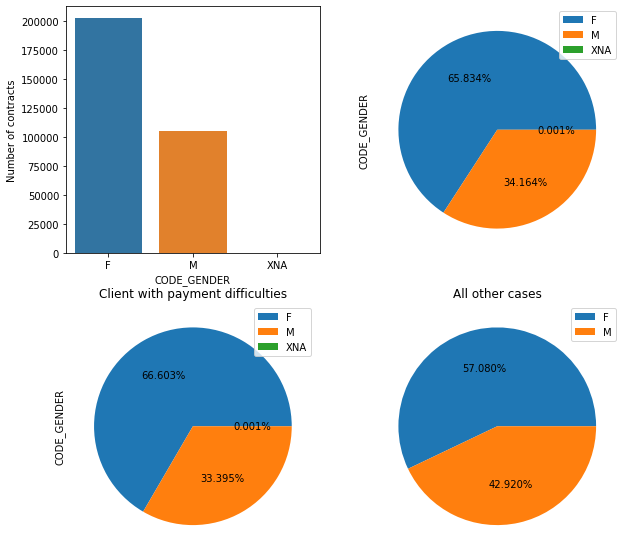

<Figure size 432x288 with 0 Axes>

In [75]:
graph("CODE_GENDER")

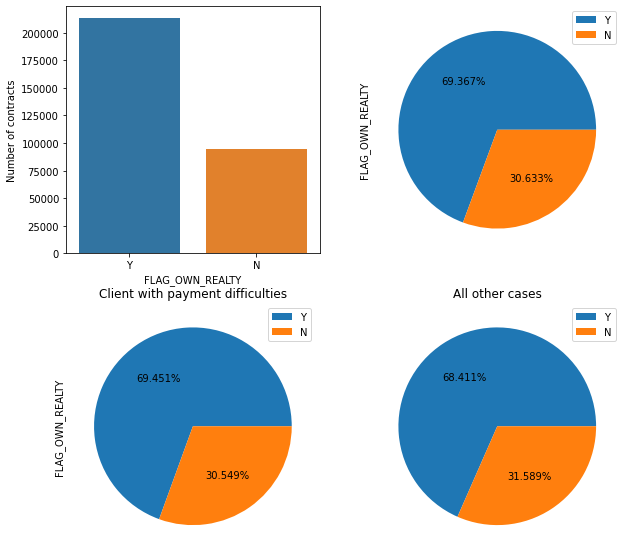

<Figure size 432x288 with 0 Axes>

In [77]:
graph("FLAG_OWN_REALTY")

# [Problem 5] (Advanced task) Posting to Notebooks